<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2023-2/blob/main/ML_day2/2_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Regression

In [2]:
# 랜덤 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

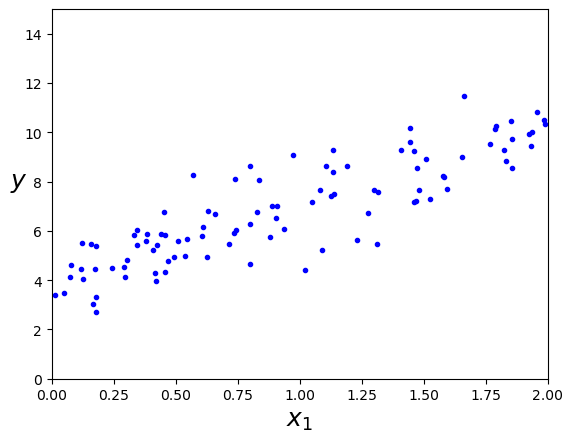

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [5]:
# 직선의 y절편, 기울기
lin_reg.intercept_, lin_reg.coef_

(array([3.95498155]), array([[3.08743908]]))

In [6]:
X_new = np.array([[0], [2]])

In [7]:
X_new.shape

(2, 1)

In [8]:
y_predict = lin_reg.predict(X_new)
y_predict

array([[ 3.95498155],
       [10.12985971]])

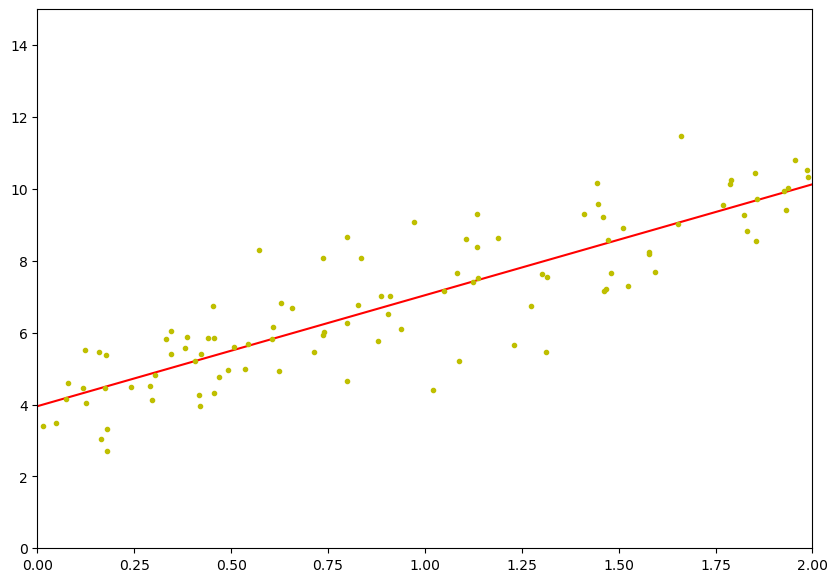

In [9]:
plt.figure(figsize=(10,7))
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()


In [10]:
from sklearn.metrics import r2_score
r2_score(y,lin_reg.predict(X))

0.7534756990775838

# Linear Regression - another example

In [11]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/Data-Science-Python/main/Day%208/data/student_scores.csv')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


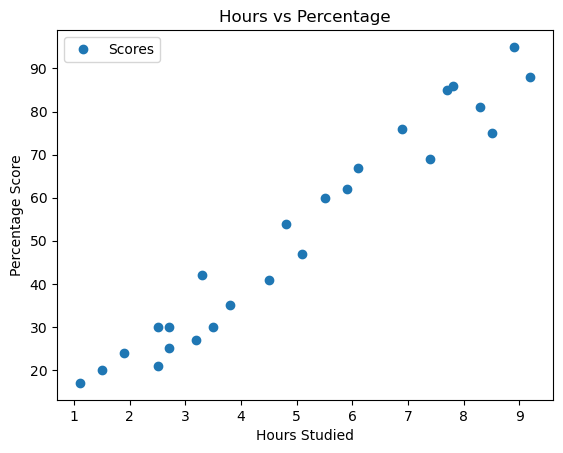

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [13]:
type(dataset['Hours'].values.reshape(25,1))

numpy.ndarray

In [14]:
hours = dataset['Hours'].values.reshape(25,1)
scores = dataset['Scores'].values.reshape(25,1)

lin_reg = LinearRegression()
lin_reg.fit(hours,scores)
print(lin_reg.coef_)
print(lin_reg.predict([[6]]))

[[9.77580339]]
[[61.13849375]]


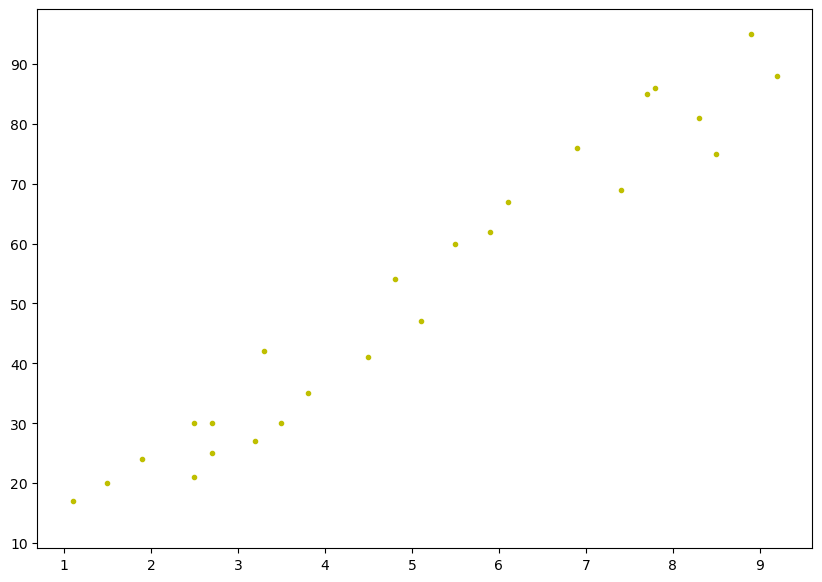

In [15]:
plt.figure(figsize=(10,7))
plt.plot(dataset['Hours'].min(), lin_reg.predict([[dataset['Hours'].min()]]), "r-", label="linear")
plt.plot(hours, scores, "y.")
# plt.axis([0, 2, 0, 15])
plt.show()

# Lasso

In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [17]:
y_predict_lasso = lasso_reg.predict(X_new)


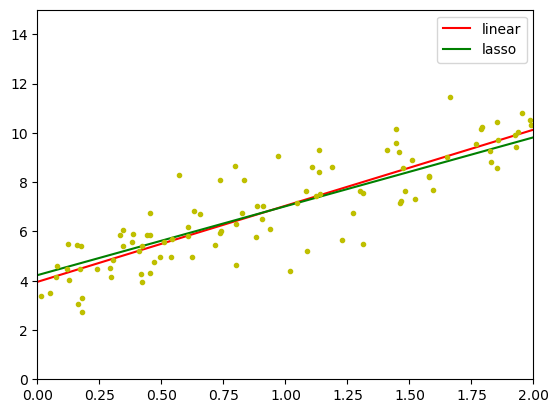

In [18]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [19]:
r2_score(y,lasso_reg.predict(X))

0.7467748617310674

# Ridge

In [20]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

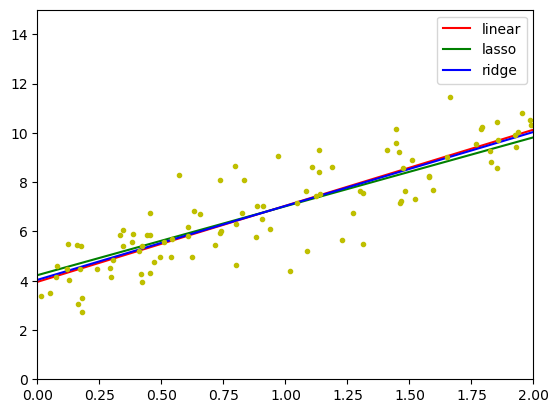

In [21]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

# Multiple Linear Regression

In [22]:
housing = pd.read_csv("https://raw.githubusercontent.com/SLCFLAB/FinTech2022/master/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing = housing[['median_income', 'total_rooms', 'median_house_value']]

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
X_train, y_train = train_set[['median_income', 'total_rooms']], train_set['median_house_value']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train_sm).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     7529.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:32:40   Log-Likelihood:            -2.1058e+05
No. Observations:               16512   AIC:                         4.212e+05
Df Residuals:                   16509   BIC:                         4.212e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.475e+04   1572.320     28.459      0.0

In [28]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [29]:
lin_reg.predict(X_test)


array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [30]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

84210.3094307468

In [31]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

62987.527578611305

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [34]:
model = LogisticRegression(random_state=0)
model.fit(x, y)


LogisticRegression(random_state=0)

In [35]:
print(model.classes_)
print(model.intercept_, model.coef_)

[0 1]
[-4.12617727] [[1.18109091]]


In [36]:
model.predict_proba(x)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

In [37]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [38]:
model.score(x, y)

1.0

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

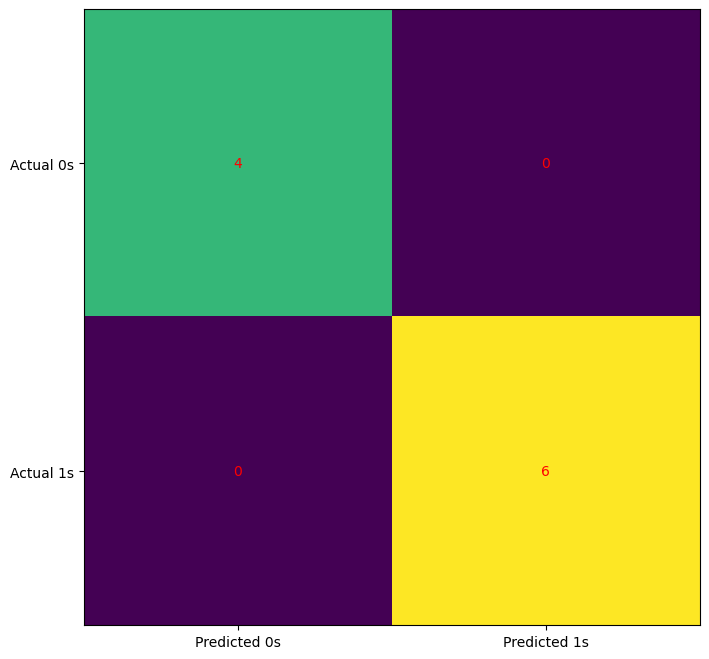

In [40]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()